In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import sys
sys.path.append("../")

from src.enablence_mux import EBMUX

In [2]:
target_grid_array = np.array([
  1301.47, 1302.60, 1303.73, 1304.87,
  1306.01, 1307.14, 1308.28, 1309.43,
  1310.57, 1311.72, 1312.87, 1314.02,
  1315.17, 1316.33, 1317.48, 1318.64
  ])*1e-9 

wavelength_fabrication = np.array([
  1301.47, 1302.60, 1303.73, 1304.87,
  1306.01, 1307.14, 1308.28, 1309.43,
  1310.57, 1311.72, 1312.87, 1314.02,
  1315.17, 1316.33, 1317.48, 1318.64
  ])*1e-9

In [3]:
sppd_mc_data = xr.open_dataset("../simulation_data/sppd_clm_calibration_1_mux_tec_tuning_calibration_mc_20240312_v0p1.nc")

In [4]:
sppd_mc_data

<xarray.Dataset>
Dimensions:                    (idd_iter: 5120, idd_laser: 16, idd_wpe: 3,
                                idd_eb: 1, idd_sppd: 1, idd_mux: 1,
                                idd_bw_lambda: 1)
Coordinates:
  * idd_iter                   (idd_iter) int32 0 1 2 3 ... 5116 5117 5118 5119
  * idd_laser                  (idd_laser) int32 0 1 2 3 4 5 ... 11 12 13 14 15
  * idd_wpe                    (idd_wpe) int32 0 1 2
  * idd_mux                    (idd_mux) int32 0
  * idd_eb                     (idd_eb) int32 0
  * idd_sppd                   (idd_sppd) int32 0
  * idd_bw_lambda              (idd_bw_lambda) int32 0
Data variables:
    wpe_slope_factor_mc        (idd_iter, idd_laser, idd_wpe) float64 ...
    enablence_mux_mc           (idd_iter, idd_laser, idd_eb) float64 ...
    sppd_laser_mc              (idd_iter, idd_laser, idd_sppd) float64 ...
    nom_temp_array             (idd_mux, idd_iter, idd_eb, idd_sppd, idd_bw_lambda, idd_wpe, idd_laser) float64 ...
    peak_current_array         (idd_mux, idd_iter, idd_eb, idd_sppd, idd_bw_lambda, idd_wpe, idd_laser) float64 ...
    output_power_array         (idd_mux, idd_iter, idd_eb, idd_sppd, idd_bw_lambda, idd_wpe, idd_laser) float64 ...
    output_lambda_array        (idd_mux, idd_iter, idd_eb, idd_sppd, idd_bw_lambda, idd_wpe, idd_laser) float64 ...
    drive_current_array        (idd_mux, idd_iter, idd_eb, idd_sppd, idd_bw_lambda, idd_wpe, idd_laser) float64 ...
    junction_temperature_mc    (idd_mux, idd_iter, idd_eb, idd_sppd, idd_bw_lambda, idd_wpe, idd_laser) float64 ...
    tec_set_point_temperature  (idd_mux, idd_iter, idd_eb, idd_sppd, idd_bw_lambda, idd_wpe) float64 ...
    warning_flag               (idd_mux, idd_iter, idd_eb, idd_sppd, idd_bw_lambda, idd_wpe) int32 ...
Attributes:
    description:  SPPD CLM Calibration data for Monte Carlo simulations - dat...

In [5]:
enablence_mux_bw_lambda = np.array([20])/17*0.1e-9
enablence_mux_3sigma = np.array([0.1])/17*0.1e-9
sppd_laser_3sigma = np.array([38])/17*0.1e-9
no_mux = np.array([0, 1])
no_mux = np.array([0])
wpe_slope_3sigma = np.array([0.01, 0.15, 0.3])

no_lasers = 16
no_iterations = 5120

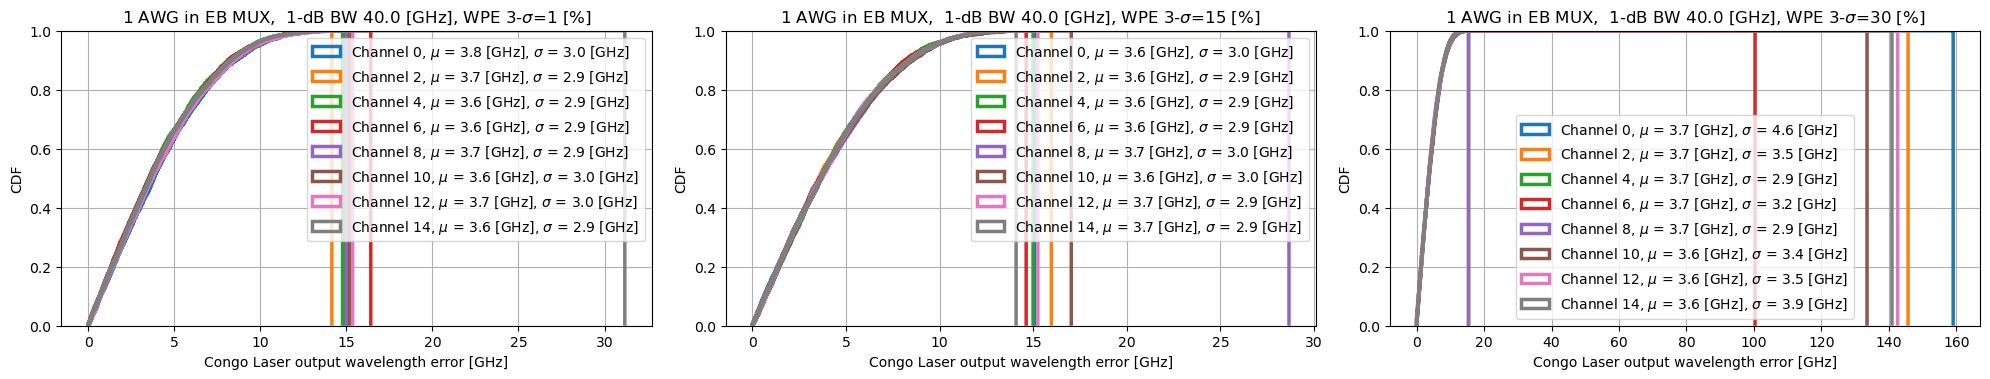

In [6]:
plt.figure(figsize=(20,7))
for idd_mux in no_mux:
  for idd_laser in range(8):
    for idd_bw_lambda in range(len(enablence_mux_bw_lambda)):
      for idd_wpe in range(len(wpe_slope_3sigma)):
        plt.subplot(2, len(wpe_slope_3sigma),idd_mux*len(wpe_slope_3sigma) + idd_wpe+1)
        idd_laser_updated = idd_laser*8
        if idd_laser == 2:
          idd_laser_updated = idd_laser * 8 -1
        idd_laser_updated = idd_laser * 2
        lambda_ch = sppd_mc_data['output_lambda_array'].sel(idd_eb = 0, idd_sppd = 0, idd_bw_lambda = idd_bw_lambda, idd_laser=idd_laser_updated, idd_mux=idd_mux, idd_wpe=idd_wpe).values
        median = np.median(np.abs(lambda_ch*1e9-wavelength_fabrication[idd_laser_updated]*1e9)/0.1*17)
        std = np.std(np.abs(lambda_ch*1e9-wavelength_fabrication[idd_laser_updated]*1e9)/0.1*17)
        plt.hist(np.abs(lambda_ch*1e9-wavelength_fabrication[idd_laser_updated]*1e9)/0.1*17, bins=1001, density=True, cumulative = True, linewidth=2.5, histtype = 'step', label=f'Channel {idd_laser_updated}, '+r'$\mu$ = '+f'{median:0.1f} [GHz], $\sigma$ = '+f'{std:0.1f} [GHz]')
        plt.legend()
        plt.ylim([0,1])
        plt.grid(True)
        plt.title(f'{idd_mux+1:0.0f} AWG in EB MUX,  1-dB BW {enablence_mux_bw_lambda[idd_bw_lambda]/0.1e-9*34:0.1f} [GHz], WPE '+r'3-$\sigma$'+f'={wpe_slope_3sigma[idd_wpe]*100:0.0f} [%]')
        plt.xlabel('Congo Laser output wavelength error [GHz]')
        plt.ylabel('CDF')
plt.tight_layout()

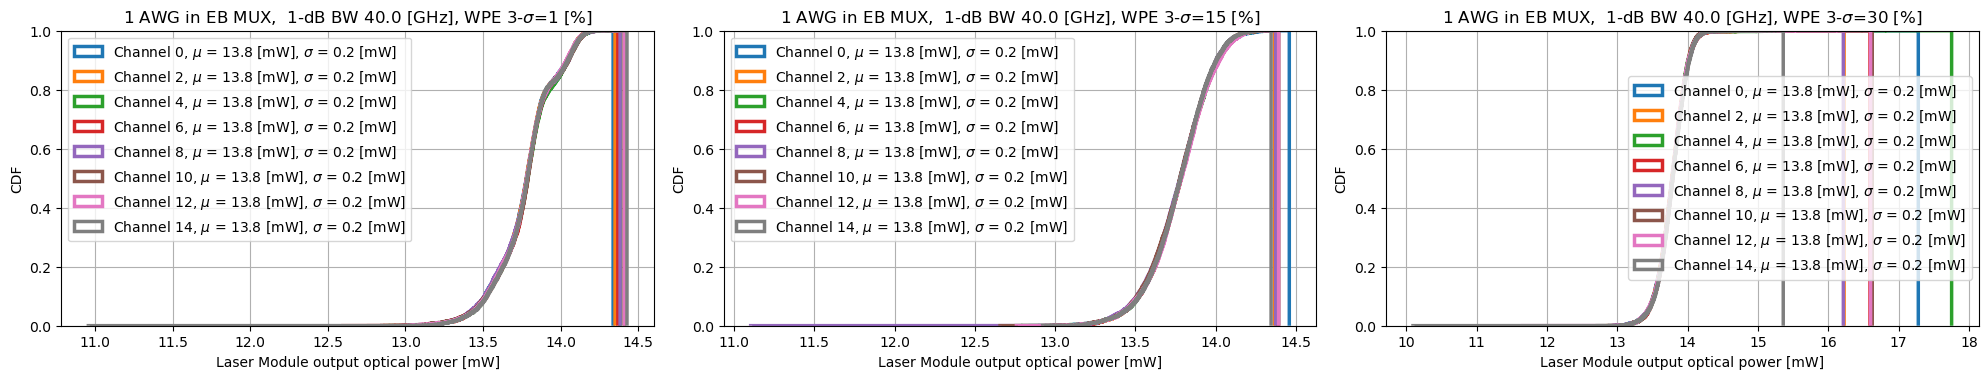

In [7]:
plt.figure(figsize=(20,7))
for idd_mux in no_mux:
  for idd_laser in range(8):
    for idd_bw_lambda in range(len(enablence_mux_bw_lambda)):
      for idd_wpe in range(len(wpe_slope_3sigma)):
        plt.subplot(2, len(wpe_slope_3sigma),idd_mux*len(wpe_slope_3sigma) + idd_wpe+1)
        idd_laser_updated = idd_laser * 2
        power_ch = sppd_mc_data['output_power_array'].sel(idd_eb = 0, idd_sppd = 0, idd_bw_lambda = idd_bw_lambda, idd_laser=idd_laser_updated, idd_mux=idd_mux, idd_wpe=idd_wpe).values * 0.9
        median = np.median(np.abs(power_ch*1e3))
        std = np.std(np.abs(power_ch*1e3))
        plt.hist(np.abs(power_ch*1e3), bins=1001, density=True, cumulative = True, linewidth=2.5, histtype = 'step', label=f'Channel {idd_laser_updated}, '+r'$\mu$ = '+f'{median:0.1f} [mW], $\sigma$ = '+f'{std:0.1f} [mW]')
        plt.legend()
        plt.ylim([0,1])
        plt.grid(True)
        plt.title(f'{idd_mux+1:0.0f} AWG in EB MUX,  1-dB BW {enablence_mux_bw_lambda[idd_bw_lambda]/0.1e-9*34:0.1f} [GHz], WPE '+r'3-$\sigma$'+f'={wpe_slope_3sigma[idd_wpe]*100:0.0f} [%]')
        plt.xlabel('Laser Module output optical power [mW]')
        plt.ylabel('CDF')
plt.tight_layout()

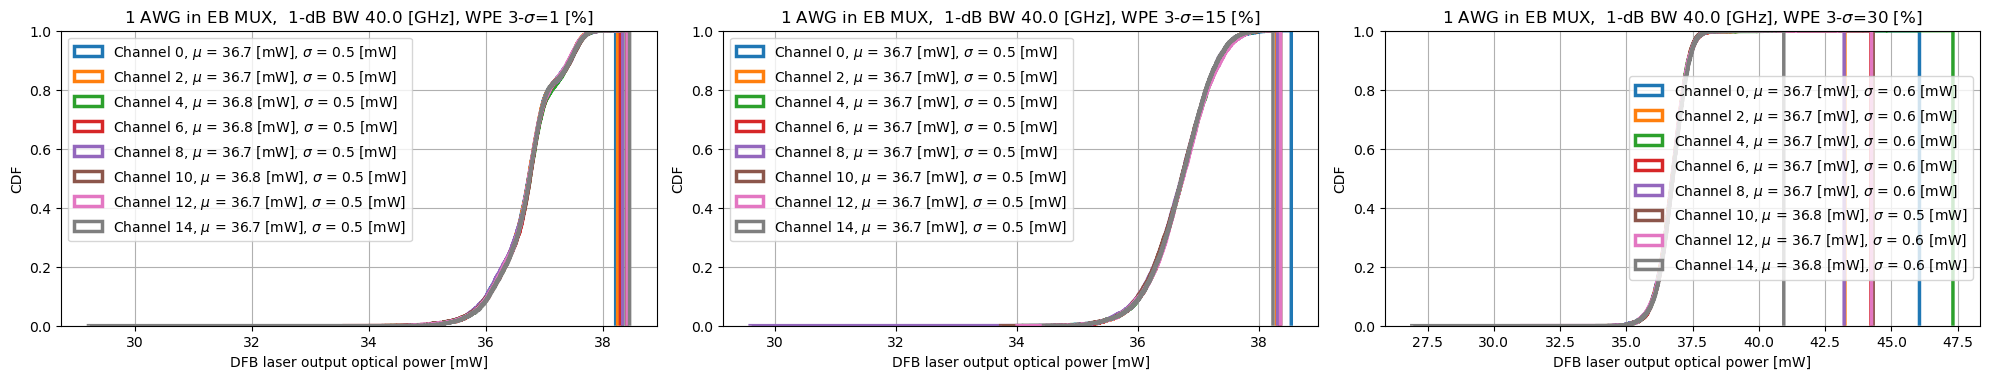

In [8]:
plt.figure(figsize=(20,7))
for idd_mux in no_mux:
  for idd_laser in range(8):
    for idd_bw_lambda in range(len(enablence_mux_bw_lambda)):
      for idd_wpe in range(len(wpe_slope_3sigma)):
        plt.subplot(2, len(wpe_slope_3sigma),idd_mux*len(wpe_slope_3sigma) + idd_wpe+1)
        idd_laser_updated = idd_laser * 2
        power_ch = sppd_mc_data['output_power_array'].sel(idd_eb = 0, idd_sppd = 0, idd_bw_lambda = idd_bw_lambda, idd_laser=idd_laser_updated, idd_mux=idd_mux, idd_wpe=idd_wpe).values /  10**(-(2.3+1.5)/10)
        median = np.median(np.abs(power_ch*1e3))
        std = np.std(np.abs(power_ch*1e3))
        plt.hist(np.abs(power_ch*1e3), bins=1001, density=True, cumulative = True, linewidth=2.5, histtype = 'step', label=f'Channel {idd_laser_updated}, '+r'$\mu$ = '+f'{median:0.1f} [mW], $\sigma$ = '+f'{std:0.1f} [mW]')
        plt.legend()
        plt.ylim([0,1])
        plt.grid(True)
        plt.title(f'{idd_mux+1:0.0f} AWG in EB MUX,  1-dB BW {enablence_mux_bw_lambda[idd_bw_lambda]/0.1e-9*34:0.1f} [GHz], WPE '+r'3-$\sigma$'+f'={wpe_slope_3sigma[idd_wpe]*100:0.0f} [%]')
        plt.xlabel('DFB laser output optical power [mW]')
        plt.ylabel('CDF')
plt.tight_layout()

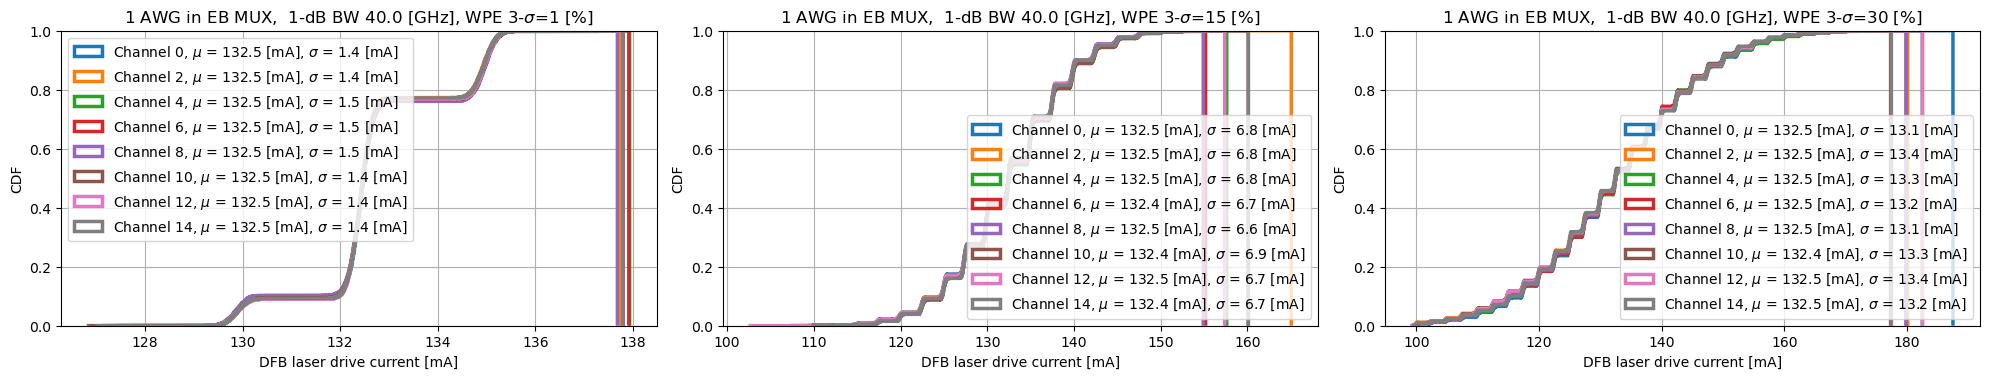

In [9]:
plt.figure(figsize=(20,7))
for idd_mux in no_mux:
  for idd_laser in range(8):
    for idd_bw_lambda in range(len(enablence_mux_bw_lambda)):
      for idd_wpe in range(len(wpe_slope_3sigma)):
        plt.subplot(2, len(wpe_slope_3sigma),idd_mux*len(wpe_slope_3sigma) + idd_wpe+1)
        idd_laser_updated = idd_laser * 2
        drive_current_ch = sppd_mc_data['drive_current_array'].sel(idd_eb = 0, idd_sppd = 0, idd_bw_lambda = idd_bw_lambda, idd_laser=idd_laser_updated, idd_mux=idd_mux, idd_wpe=idd_wpe).values
        median = np.median(np.abs(drive_current_ch*1e3))
        std = np.std(np.abs(drive_current_ch*1e3))
        plt.hist(np.abs(drive_current_ch*1e3), bins=1001, density=True, cumulative = True, linewidth=2.5, histtype = 'step', label=f'Channel {idd_laser_updated}, '+r'$\mu$ = '+f'{median:0.1f} [mA], $\sigma$ = '+f'{std:0.1f} [mA]')
        plt.legend()
        plt.ylim([0,1])
        plt.grid(True)
        plt.title(f'{idd_mux+1:0.0f} AWG in EB MUX,  1-dB BW {enablence_mux_bw_lambda[idd_bw_lambda]/0.1e-9*34:0.1f} [GHz], WPE '+r'3-$\sigma$'+f'={wpe_slope_3sigma[idd_wpe]*100:0.0f} [%]')
        plt.xlabel('DFB laser drive current [mA]')
        plt.ylabel('CDF')
plt.tight_layout()

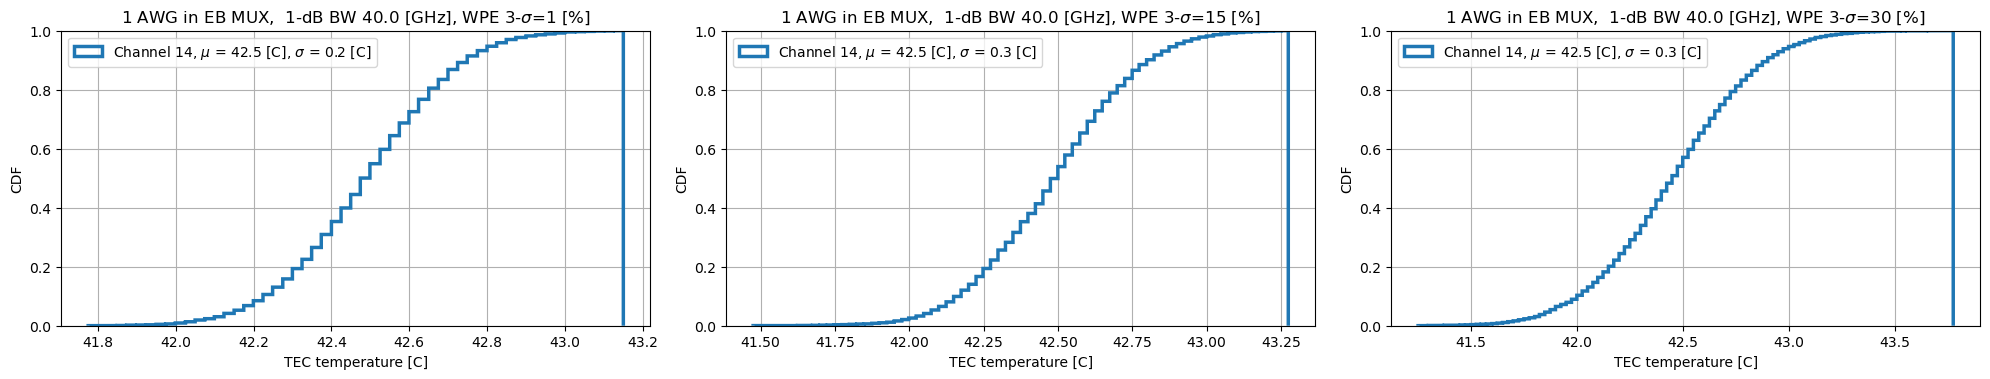

In [10]:
plt.figure(figsize=(20,7))
for idd_mux in no_mux:
  for idd_bw_lambda in range(len(enablence_mux_bw_lambda)):
    for idd_wpe in range(len(wpe_slope_3sigma)):
      plt.subplot(2, len(wpe_slope_3sigma),idd_mux*len(wpe_slope_3sigma) + idd_wpe+1)
      tec_temperature_ch = sppd_mc_data['tec_set_point_temperature'].sel(idd_eb = 0, idd_sppd = 0, idd_bw_lambda = idd_bw_lambda, idd_mux=idd_mux, idd_wpe=idd_wpe).values
      median = np.median(np.abs(tec_temperature_ch)-273)
      std = np.std(np.abs(tec_temperature_ch)-273)
      plt.hist(np.abs(tec_temperature_ch)-273, bins=1001, density=True, cumulative = True, linewidth=2.5, histtype = 'step', label=f'Channel {idd_laser_updated}, '+r'$\mu$ = '+f'{median:0.1f} [C], $\sigma$ = '+f'{std:0.1f} [C]')
      plt.legend()
      plt.ylim([0,1])
      plt.grid(True)
      plt.title(f'{idd_mux+1:0.0f} AWG in EB MUX,  1-dB BW {enablence_mux_bw_lambda[idd_bw_lambda]/0.1e-9*34:0.1f} [GHz], WPE '+r'3-$\sigma$'+f'={wpe_slope_3sigma[idd_wpe]*100:0.0f} [%]')
      plt.xlabel('TEC temperature [C]')
      plt.ylabel('CDF')
plt.tight_layout()

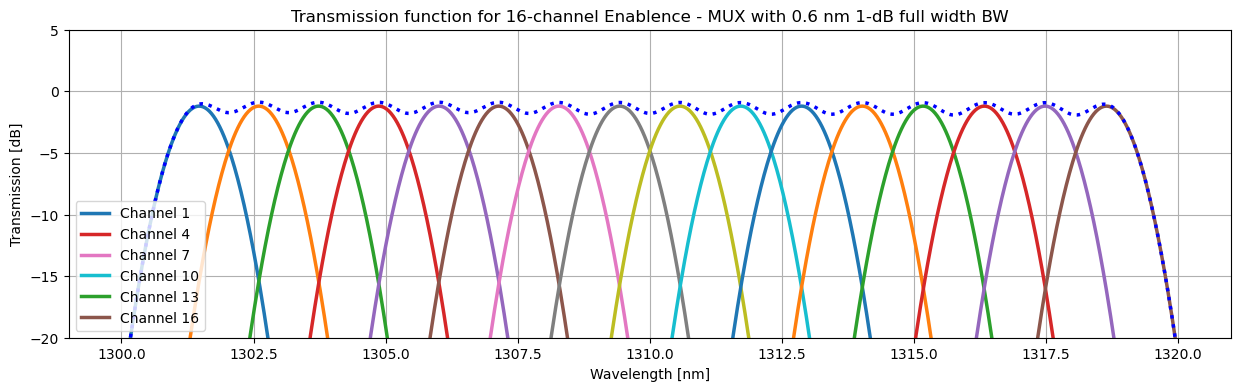

In [11]:
il_mag = 10**(-1.2/10)
bw_lambda = 0.3

lambda_sweep = np.linspace(1300, 1320, 1001)
tf_array = np.zeros((len(target_grid_array), len(lambda_sweep)))

for idd_grid, grid_val in enumerate(target_grid_array*1e9):
  tf_array[idd_grid,:] = il_mag*np.exp(-((lambda_sweep-grid_val)/bw_lambda)**2/4.343)

plt.figure(figsize=(15,4))
for idd_grid, grid_val in enumerate(target_grid_array*1e9):
  if idd_grid %3 == 0:
    plt.plot(lambda_sweep, 10*np.log10(tf_array[idd_grid,:]), linewidth=2.5, label=f'Channel {idd_grid+1}')
  else:
    plt.plot(lambda_sweep, 10*np.log10(tf_array[idd_grid,:]), linewidth=2.5)
plt.plot(lambda_sweep, 10*np.log10(np.sum(tf_array, axis=0)), linewidth=2.5, linestyle = ':', color = 'b')
plt.ylim([-20,5])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.title('Transmission function for 16-channel Enablence - MUX with 0.6 nm 1-dB full width BW')
plt.grid(True)
plt.legend()

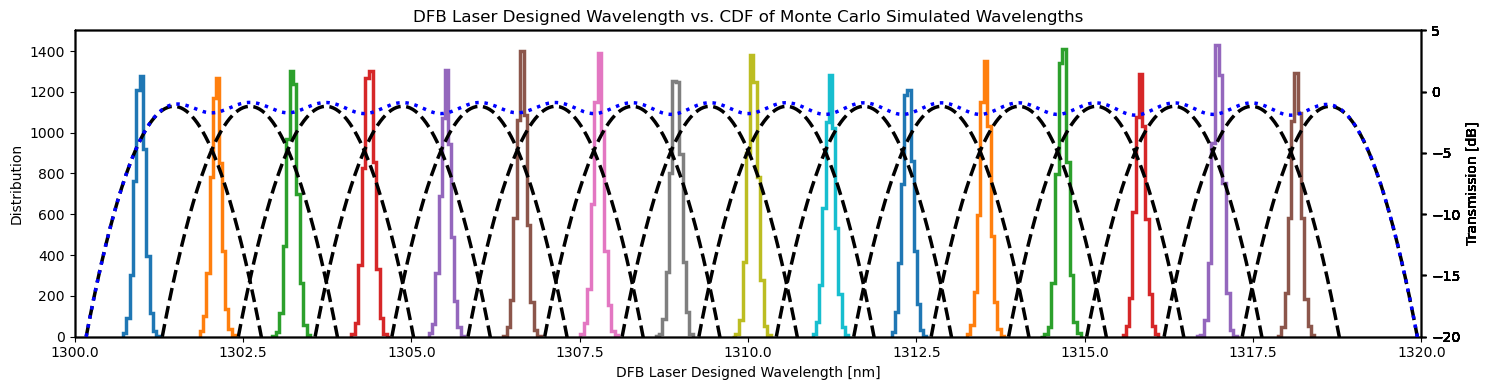

In [12]:
tf_array = np.zeros((len(target_grid_array), len(lambda_sweep)))
fig, ax1 = plt.subplots(figsize=(15,4))
for idd_laser in range(16):
  sppd_laser_ch = sppd_mc_data['sppd_laser_mc'].sel(idd_sppd = 0, idd_laser=idd_laser).values + target_grid_array[idd_laser] - 0.5e-9
  if idd_laser %3 == 0:
    ax1.hist(sppd_laser_ch*1e9, bins=11, linewidth=2.5, histtype = 'step', label=f'Channel {idd_laser}')
  else:
    ax1.hist(sppd_laser_ch*1e9, bins=11, linewidth=2.5, histtype = 'step')
  ax2 = ax1.twinx()
  tf_array[idd_laser,:] = il_mag*np.exp(-((lambda_sweep-target_grid_array[idd_laser]*1e9)/bw_lambda)**2/4.343)
  ax2.plot(lambda_sweep, 10*np.log10(tf_array[idd_laser,:]), linewidth=2.5, linestyle = '--', color = 'k')
  ax1.set_xlabel('DFB Laser Designed Wavelength [nm]')
  ax1.set_ylabel('Distribution')
  ax1.set_xlim([1300, 1320])
  ax2.set_xlim([1300, 1320])
  ax2.set_ylim([-20, 5])
  ax2.set_ylabel('Transmission [dB]')
ax2.plot(lambda_sweep, 10*np.log10(np.sum(tf_array, axis=0)), linewidth=2.5, linestyle = ':', color = 'b')
ax1.set_title("DFB Laser Designed Wavelength vs. CDF of Monte Carlo Simulated Wavelengths")
plt.tight_layout()

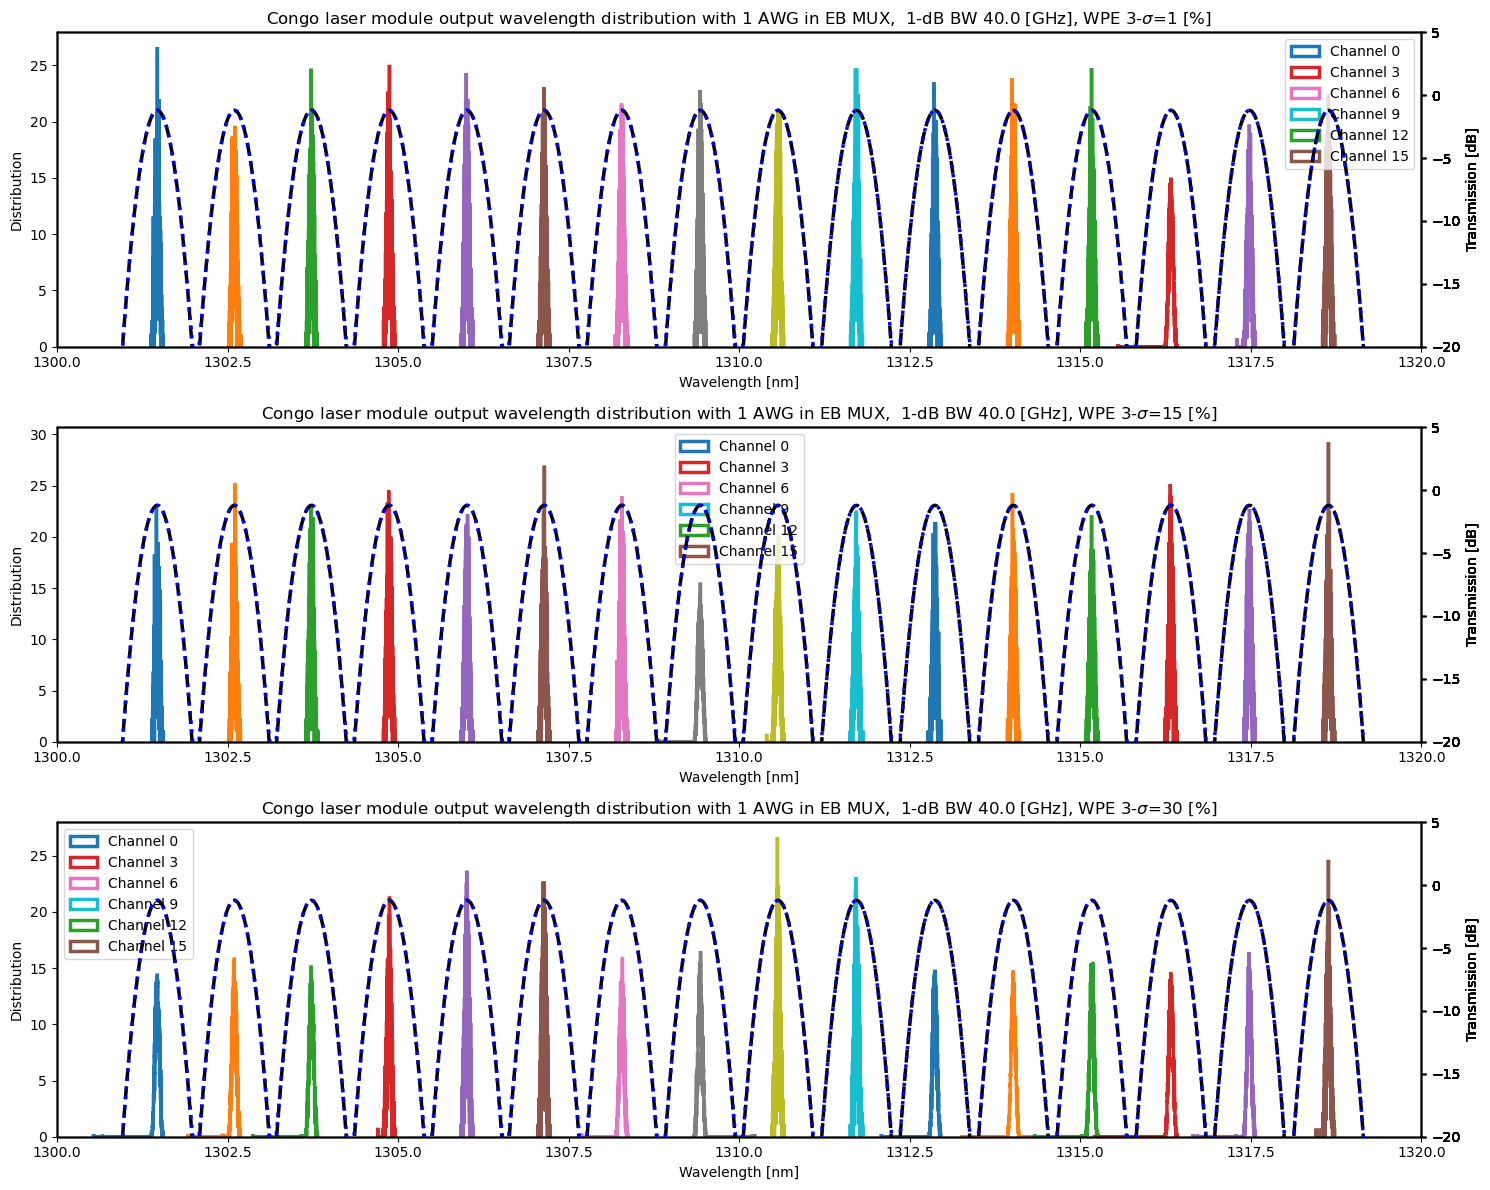

In [13]:
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots(len(wpe_slope_3sigma), 1, figsize=(15,4*len(wpe_slope_3sigma)))
for idd_mux in no_mux:
  for idd_wpe in range(len(wpe_slope_3sigma)):
    tf_array = np.zeros((len(target_grid_array), len(lambda_sweep)))
    for idd_laser in range(16):
      sppd_laser_ch = sppd_mc_data['sppd_laser_mc'].sel(idd_sppd = 0, idd_laser=idd_laser_updated).values + target_grid_array[idd_laser] - 0.5e-9
      output_lambda_array = sppd_mc_data['output_lambda_array'].sel(idd_eb = 0, idd_sppd = 0, idd_bw_lambda = idd_bw_lambda, idd_laser=idd_laser, idd_mux=idd_mux, idd_wpe=idd_wpe).values
      if idd_laser % 3 == 0:
        ax[idd_mux*len(wpe_slope_3sigma) + idd_wpe].hist(output_lambda_array*1e9, bins=1001, linewidth=2.5, histtype = 'step', density=True, color = color[idd_laser%10], label=f'Channel {idd_laser}')
      else:
        ax[idd_mux*len(wpe_slope_3sigma) + idd_wpe].hist(output_lambda_array*1e9, bins=1001, linewidth=2.5, histtype = 'step', density=True, color = color[idd_laser%10])
      ax2 = ax[idd_mux*len(wpe_slope_3sigma) + idd_wpe].twinx()
      ax[idd_mux*len(wpe_slope_3sigma) + idd_wpe].set_title('Congo laser module output wavelength distribution with '+f'{idd_mux+1:0.0f} AWG in EB MUX,  1-dB BW {enablence_mux_bw_lambda[idd_bw_lambda]/0.1e-9*34:0.1f} [GHz], WPE '+r'3-$\sigma$'+f'={wpe_slope_3sigma[idd_wpe]*100:0.0f} [%]')
      ax[idd_mux*len(wpe_slope_3sigma) + idd_wpe].set_xlabel('Wavelength [nm]')
      ax[idd_mux*len(wpe_slope_3sigma) + idd_wpe].set_ylabel('Distribution')
      ax[idd_mux*len(wpe_slope_3sigma) + idd_wpe].set_xlim([1300, 1320])
      tf_array[idd_laser,:] = il_mag*np.exp(-((lambda_sweep-target_grid_array[idd_laser]*1e9)/enablence_mux_bw_lambda[idd_bw_lambda]/1e9)**2/4.343)
      ax2.plot(lambda_sweep, 10*np.log10(tf_array[idd_laser,:]), linewidth=2.5, linestyle = '--', color = 'k')
      ax2.set_xlim([1300, 1320])
      ax2.set_ylim([-20, 5])
      ax2.set_ylabel('Transmission [dB]')
    ax2.plot(lambda_sweep, 10*np.log10(np.sum(tf_array, axis=0)), linewidth=2.5, linestyle = ':', color = 'b')
    ax[idd_mux*len(wpe_slope_3sigma) + idd_wpe].legend()
plt.tight_layout()